# Discrete Hopfield Network

In this article, we describe core ideas behind discrete hopfield
networks and try to understand how it works. In addition, we explore
main problems related to this algorithm. And finally, we take a look
into simple example that aims to memorize digit patterns and reconstruct
them from corrupted samples.

In this article we are going to learn about Discrete Hopfield Network
algorithm.

Discrete Hopfield Network is a type of algorithms which is called -
[Autoassociative
memories](https://en.wikipedia.org/wiki/Autoassociative_memory) Don't be
scared of the word <span class="title-ref">Autoassociative</span>. The
idea behind this type of algorithms is very simple. It can store useful
information in <span class="title-ref">memory</span> and later it is
able to reproduce this information from partially broken patterns. You
can perceive it as human memory. For instance, imagine that you look at
an old picture of a place where you were long time ago, but this picture
is of very bad quality and very blurry. By looking at the picture you
manage to recognize a few objects or places that make sense to you and
form some objects even though they are blurry. It can be a house, a lake
or anything that can add up to the whole picture and bring out some
associations about this place. With these details that you got from your
memory so far other parts of picture start to make even more sense.
Though you don't clearly see all objects in the picture, you start to
remember things and withdraw from your memory some images, that cannot
be seen in the picture, just because of those very familiarly-shaped
details that you've got so far. That's what it is all about.
Autoassociative memory networks is a possibly to interpret functions of
memory into neural network model.

Don't worry if you have only basic knowledge in Linear Algebra; in this
article I'll try to explain the idea as simple as possible.

## Architecture

Discrete Hopfield Network is an easy algorithm. It's simple because you
don't need a lot of background knowledge in Maths for using it.
Everything you need to know is how to make a basic Linear Algebra
operations, like outer product or sum of two matrices.

Let's begin with a basic thing. What do we know about this neural
network so far? Just the name and the type. From the name we can
identify one useful thing about the network. It's
<span class="title-ref">Discrete</span>. It means that network only
works with binary vectors. But for this network we wouldn't use binary
numbers in a typical form. Instead, we will use bipolar numbers. They
are almost the same, but instead of 0 we are going to use -1 to decode a
negative state. We can't use zeros. And there are two main reasons for
it. The first one is that zeros reduce information from the network
weight, later in this article you are going to see it. The second one is
more complex, it depends on the nature of bipolar vectors. Basically
they are more likely to be orthogonal to each other which is a critical
moment for the Discrete Hopfield Network. But as I mentioned before we
won't talk about proofs or anything not related to basic understanding
of Linear Algebra operations.

So, let's look at how we can train and use the Discrete Hopfield
Network.

## Training procedure

We can't use memory without any patterns stored in it. So first of all
we are going to learn how to train the network. For the Discrete
Hopfield Network train procedure doesn't require any iterations. It
includes just an outer product between input vector and transposed input
vector.

$$\begin{aligned}
\begin{align*}
    W = x \cdot x^T =
    \left[
    \begin{array}{c}
      x_1\\
      x_2\\
      \vdots\\
      x_n
    \end{array}
    \right]
    \cdot
    \left[
    \begin{array}{c}
      x_1 & x_2 & \cdots & x_n
    \end{array}
    \right]
\end{align*}
\end{aligned}$$

$$\begin{aligned}
\begin{align*}
    =
    \left[
    \begin{array}{c}
      x_1^2 & x_1 x_2 & \cdots & x_1 x_n \\
      x_2 x_1 & x_2^2 & \cdots & x_2 x_n \\
      \vdots\\
      x_n x_1 & x_n x_2 & \cdots & x_n^2 \\
    \end{array}
    \right]
\end{align*}
\end{aligned}$$

$W$ is a weight matrix and $x$ is an input vector. Each value $x_i$ in
the input vector can only be -1 or 1. So on the matrix diagonal we only
have squared values and it means we will always see 1s at those places.
Think about it, every time, in any case, values on the diagonal can take
just one possible state. We can't use this information, because it
doesn't say anything useful about patterns that are stored in the memory
and even can make incorrect contribution into the output result. For
this reason we need to set up all the diagonal values equal to zero. The
final weight formula should look like this one below.

$$\begin{aligned}
\begin{align*}
    W =
    x x^T - I =
    \left[
    \begin{array}{c}
      0 & x_1 x_2 & \cdots & x_1 x_n \\
      x_2 x_1 & 0 & \cdots & x_2 x_n \\
      \vdots\\
      x_n x_1 & x_n x_2 & \cdots & 0 \\
    \end{array}
    \right]
\end{align*}
\end{aligned}$$

Where $I$ is an identity matrix.

But usually we need to store more values in memory. For another pattern
we have to do exactly the same procedure as before and then just add the
generated weight matrix to the old one.

$$W = W_{old} + W_{new}$$

And this procedure generates us a new weight that would be valid for
both previously stored patterns. Later you can add other patterns using
the same algorithm.

But if you need to store multiple vectors inside the network at the same
time you don't need to compute the weight for each vector and then sum
them up. If you have a matrix $X \in \Bbb R^{m\times n}$ where each row
is the input vector, then you can just make product matrix between
transposed input matrix and input matrix.

$$W = X^T X - m I$$

Where $I$ is an identity matrix ($I \in \Bbb R^{n\times n}$), $n$ is a
number of features in the input vector and $m$ is a number of input
patterns inside the matrix $X$. Term $m I$ removes all values from the
diagonal. Basically we remove 1s for each stored pattern and since we
have $m$ of them, we should do it $m$ times. Practically, it's not very
good to create an identity matrix just to set up zeros on the diagonal,
especially when dimension on the matrix is very big. Usually linear
algebra libraries give you a possibility to set up diagonal values
without creating an additional matrix and this solution would be more
efficient. For example in NumPy library it's a
[numpy.fill_diagonal](http://docs.scipy.org/doc/numpy/reference/generated/numpy.fill_diagonal.html)
function.

Let's check an example just to make sure that everything is clear. Let's
pretend we have a vector $u$.

$$\begin{aligned}
u = \left[\begin{align*}1 \\ -1 \\ 1 \\ -1\end{align*}\right]
\end{aligned}$$

Assume that network doesn't have patterns inside of it, so the vector
$u$ would be the first one. Let's compute weights for the network.

$$\begin{aligned}
\begin{align*}
    U = u u^T =
    \left[
        \begin{array}{c}
            1 \\
            -1 \\
            1 \\
            -1
        \end{array}
    \right]
    \left[
        \begin{array}{c}
            1 & -1 & 1 & -1
        \end{array}
    \right]
    =
    \left[
        \begin{array}{cccc}
            1 & -1 & 1 & -1\\
            -1 & 1 & -1 & 1\\
            1 & -1 & 1 & -1\\
            -1 & 1 & -1 & 1
        \end{array}
    \right]
\end{align*}
\end{aligned}$$

Look closer to the matrix $U$ that we got. Outer product just repeats
vector 4 times with the same or inversed values. First and third columns
(or rows, it doesn't matter, because matrix is symmetrical) are exactly
the same as the input vector. The second and fourth are also the same,
but with an opposite sign. That's because in the vector $u$ we have 1 on
the first and third places and -1 on the other.

To make weight from the $U$ matrix, we need to remove ones from the
diagonal.

$$\begin{aligned}
W = U - I = \left[
    \begin{array}{cccc}
        1 & -1 & 1 & -1\\
        -1 & 1 & -1 & 1\\
        1 & -1 & 1 & -1\\
        -1 & 1 & -1 & 1
    \end{array}
\right] -
\left[
    \begin{array}{cccc}
        1 & 0 & 0 & 0\\
        0 & 1 & 0 & 0\\
        0 & 0 & 1 & 0\\
        0 & 0 & 0 & 1
    \end{array}
\right]
\end{aligned}$$

$$\begin{aligned}
= \left[
    \begin{array}{cccc}
        0 & -1 & 1 & -1\\
        -1 & 0 & -1 & 1\\
        1 & -1 & 0 & -1\\
        -1 & 1 & -1 & 0
    \end{array}
\right]
\end{aligned}$$

$I$ is the identity matrix and $I \in \Bbb R^{n \times n}$, where $n$ is
a number of features in the input vector.

When we have one stored vector inside the weights we don't really need
to remove 1s from the diagonal. The main problem would appear when we
have more than one vector stored in the weights. Each value on the
diagonal would be equal to the number of stored vectors in it.

## Recovery from memory

The main advantage of Autoassociative network is that it is able to
recover pattern from the memory using just a partial information about
the pattern. There are already two main approaches to this situation,
synchronous and asynchronous. We are going to master both of them.

### Synchronous

Synchronous approach is much more easier for understanding, so we are
going to look at it firstly. To recover your pattern from memory you
just need to multiply the weight matrix by the input vector.

$$\begin{aligned}
\begin{align*}
    s = {W}\cdot{x}=
    \left[
    \begin{array}{cccc}
      w_{11} & w_{12} & \ldots & w_{1n}\\
      w_{21} & w_{22} & \ldots & w_{2n}\\
      \vdots & \vdots & \ddots & \vdots\\
      w_{n1} & w_{n2} & \ldots & w_{nn}
    \end{array}
    \right]
    \left[
    \begin{array}{c}
      x_1\\
      x_2\\
      \vdots\\
      x_n
    \end{array}
    \right]
\end{align*}
\end{aligned}$$

$$\begin{aligned}
\begin{align*}
    =
    \left[
        \begin{array}{c}
          w_{11}x_1+w_{12}x_2 + \cdots + w_{1n} x_n\\
          w_{21}x_1+w_{22}x_2 + \cdots + w_{2n} x_n\\
          \vdots\\
          w_{n1}x_1+w_{n2}x_2 + \cdots + w_{nn} x_n\\
        \end{array}
    \right]
\end{align*}
\end{aligned}$$

Let's analyze the result. We summed up all information from the weights
where each value can be any integer with an absolute value equal to or
smaller than the number of patterns inside the network. It's clear that
total sum value for $s_i$ is not necessary equal to -1 or 1, so we have
to make additional operations that will make bipolar vector from the
vector $s$.

Let's think about this product operation. What does it actualy do?
Basically after training procedure we saved our pattern dublicated $n$
times (where $n$ is a number of input vector features) inside the
weight. When we store more patterns we get interception between them
(it's called a **crosstalk**) and each pattern add some noise to other
patterns. So, after perfoming product matrix between $W$ and $x$ for
each value from the vector $x$ we'll get a recovered vector with a
little bit of noise. For $x_1$ we get a first column from the matrix
$W$, for the $x_2$ a second column, and so on. Then we sum up all
vectors together. This operation can remind you of voting. For example
we have 3 vectors. If the first two vectors have 1 in the first position
and the third one has -1 at the same position, the winner should be 1.
We can perform the same procedure with $sign$ function. So the output
value should be 1 if total value is greater then zero and -1 otherwise.

$$\begin{aligned}
sign(x) = \left\{
    \begin{array}{lr}
        &1 && : x \ge 0\\
        &-1 && : x < 0
    \end{array}
\right.\\
\end{aligned}$$$$y = sign(s)$$

That's it. Now $y$ store the recovered pattern from the input vector
$x$.

Maybe now you can see why we can't use zeros in the input vectors. In
<span class="title-ref">voting</span> procedure we use each row that was
multiplied by bipolar number, but if values had been zeros they would
have ignored columns from the weight matrix and we would have used only
values related to ones in the input pattern.

Of course you can use 0 and 1 values and sometime you will get the
correct result, but this approach give you much worse results than
explained above.

### Asynchronous

Previous approach is good, but it has some limitations. If you change
one value in the input vector it can change your output result and value
won't converge to the known pattern. Another popular approach is an
**asynchronous**. This approach is more likely to remind you of real
memory. At the same time in network activates just one random neuron
instead of all of them. In terms of neural networks we say that **neuron
fires**. We iteratively repeat this operation multiple times and after
some point network will converge to some pattern.

Let's look at this example: Consider that we already have a weight
matrix $W$ with one pattern $x$ inside of it.

$$\begin{aligned}
\begin{align*}
    W =
    \left[
    \begin{array}{cccc}
      0 & 1 & -1 \\
      1 & 0 & -1 \\
      -1 & -1 & 0
    \end{array}
    \right]
\end{align*}
\end{aligned}$$

$$\begin{aligned}
\begin{align*}
    x =
    \left[
        \begin{array}{c}
          1\\
          1\\
          -1
        \end{array}
    \right]
\end{align*}
\end{aligned}$$

Let's assume that we have a vector $x^{'}$ from which we want to recover
the pattern.

$$\begin{aligned}
\begin{align*}
    x^{'} =
    \left[
        \begin{array}{c}
          1\\
          -1\\
          -1
        \end{array}
    \right]
\end{align*}
\end{aligned}$$

In first iteration one neuron fires. Let it be the second one. So we
multiply the first column by this selected value.

$$\begin{aligned}
\begin{align*}
    x^{'}_2 =
    sign(\left[
        \begin{array}{c}
          1 & -1 & -1
        \end{array}
    \right] \cdot \left[
        \begin{array}{c}
          1\\
          0\\
          -1
        \end{array}
    \right]) = sign(2) = 1
\end{align*}
\end{aligned}$$

And after this operation we set up a new value into the input vector
$x$.

$$\begin{aligned}
\begin{align*}
    x^{'} =
    \left[
        \begin{array}{c}
          1\\
          1\\
          -1
        \end{array}
    \right]
\end{align*}
\end{aligned}$$

As you can see, after first iteration value is exactly the same as $x$
but we can keep going. In second iteration random neuron fires again.
Let's pretend that this time it was the third neuron.

$$\begin{aligned}
\begin{align*}
    x^{'}_3 =
    sign(\left[
        \begin{array}{c}
          1 & 1 & -1
        \end{array}
    \right] \cdot \left[
        \begin{array}{c}
          -1\\
          -1\\
          0
        \end{array}
    \right]) = sign(-2) = -1
\end{align*}
\end{aligned}$$

$x^{'}_3$ is exactly the same as in the $x^{'}$ vector so we don't need
to update it. We can repeat it as many times as we want, but we will be
getting the same value.

## Memory limit

Obviously, you can't store infinite number of vectors inside the
network. There are two good rules of thumb.

Consider that $n$ is the dimension (number of features) of your input
vector and $m$ is the number of patterns that you want to store in the
network. The first rule gives us a simple ration between $m$ and $n$.

$$m \approx 0.18 n$$

The main problem with this rule is that proof assumes that stored
vectors inside the weight are completely random with an equal
probability. Unfortunately, that is not always true. Let's suppose we
save some images of numbers from 0 to 9. Pictures are black and white,
so we can encode them in bipolar vectors. Will the probabilities be the
same for seeing as many white pixels as black ones? Usually no. More
likely that number of white pixels would be greater than number of black
ones. Before use this rule you have to think about type of your input
patterns.

The second rule uses a logarithmic proportion.

$$m = \left \lfloor \frac{n}{2 \cdot log(n)} \right \rfloor$$

Both of these rules are good assumptions about the nature of data and
its possible limits in memory. Of course, you can find situations when
these rules will fail.

## Hallucinations

Hallucinations is one of the main problems in the Discrete Hopfield
Network. Sometimes network output can be something that we hasn't taught
it.

To understand this phenomena we should firstly define the Hopfield
energy function.

$$E = -\frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} w_{ij} x_i x_j + \sum_{i=1}^{n} \theta_i x_i$$

Where $w_{ij}$ is a weight value on the $i$-th row and $j$-th column.
$x_i$ is a $i$-th values from the input vector $x$. $\theta$ is a
threshold. Threshold defines the bound to the sign function. For this
reason $\theta$ is equal to 0 for the Discrete Hopfield Network. In
terms of a linear algebra we can write formula for the Discrete Hopfield
Network energy Function more simpler.

$$E = -\frac{1}{2} x^T W x$$

But linear algebra notation works only with the $x$ vector, we can't use
matrix $X$ with multiple input patterns instead of the $x$ in this
formula. For the energy function we're always interested in finding a
minimum value, for this reason it has minus sign at the beginning.

Let's try to visualize it. Assume that values for vector $x$ can be
continous in order and we can visualize them using two parameters. Let's
pretend that we have two vectors <span class="title-ref">\[1,
-1\]</span> and <span class="title-ref">\[-1, 1\]</span> stored inside
the network. Below you can see the plot that visualizes energy function
for this situation.

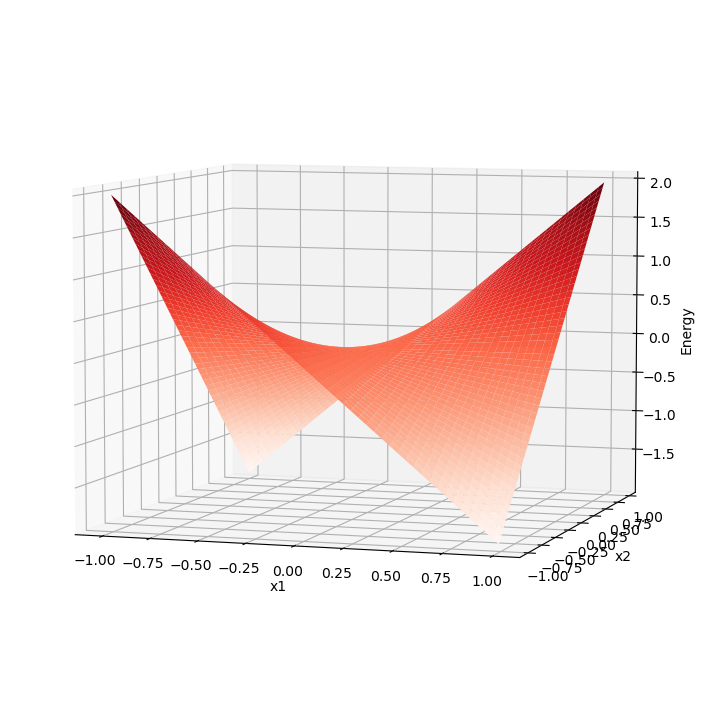

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def energy(input_vector):
    input_vector = np.array(input_vector)
    X = np.array([[1, -1], [-1, 1]])
    weight = X.T.dot(X) - 2 * np.eye(2)
    return -0.5 * input_vector.dot(weight).dot(input_vector)


fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-1.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)
energies = map(energy, zip(np.ravel(X), np.ravel(Y)))
zs = np.array(list(energies))
Z = zs.reshape(X.shape)

ax.view_init(elev=6, azim=-72)
ax.plot_surface(X, Y, Z, cmap='Reds')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Energy')

plt.show()


As you can see we have two minimum values at the same points as those
patterns that are already stored inside the network. But between these
two patterns function creates a saddle point somewhere at the point with
coordinates $(0, 0)$. In this case we can't stick to the points
$(0, 0)$. But in situation with more dimensions this saddle points can
be at the level of available values and they could be hallucination.
Unfortunately, we are very limited in terms of numbers of dimensions we
could plot, but the problem is still the same.

## Implementation

In [4]:
import brainpy as bp
import brainpy.math as bm

class HopfieldNet(bp.DynamicalSystem):
  def __init__(self, num):
    super().__init__()
    self.num = num
    self.weight = bm.Variable(bm.zeros([num, num]))

  # Train function for the Hopfield net. (By updating the weights)
  @bm.cls_jit
  def store_patterns(self, samples):
    # data: An array with [d, N]. 'd' is the number of data samples used to train. (In this case 2)
    assert samples.ndim == 2
    assert samples.shape[1] == self.num

    # Loop through all data samples.
    bm.for_loop(self.store, samples)

    # Hopfield nets are a form of RNNs, albeit without self-connections, and so,
    # we need to make sure that the diagonal elements of the final weight matrix are zero.
    bm.fill_diagonal(self.weight, 0)

  # Storing one sample pattern
  @bm.cls_jit
  def store(self, sample):
    # sample is an array with the shape of (N,)
    assert self.num == sample.shape[0]

    # Data cross-product gives neural hopfield update rule.
    w_update = bm.outer(sample, sample)

    # Sum all pattern cross-products.
    self.weight += w_update

  def async_recover(self, sample, n, energy=False):
    # n: the number of iterations to recover
    # energy: calculate the energy function
    idxs = bm.random.randint(0, self.num, n)  # the sampled positions
    # JIT compilation requires to label the value to be changed as Variable
    sample = bm.Variable(sample)

    def recover(i):
      # i: the position to update
      # update
      sample[i] = bm.sign(bm.inner(self.weight[i], sample))
      # return energy
      if energy:
        return self.energy(sample)

    r = bm.for_loop(recover, idxs) # for loop JIT
    return (sample, r) if energy else sample

  def sync_recover(self, sample, n, energy=False):
    # n: the number of iterations to recover
    # energy: calculate the energy function
    idxs = bm.arange(n)  # the update times
    # JIT compilation requires to label the value to be changed as Variable
    sample = bm.Variable(sample)

    def recover(i):
      # i: the position to update
      # update
      sample.value = bm.sign(self.weight @ sample)
      # return energy
      if energy:
        return self.energy(sample)

    r = bm.for_loop(recover, idxs)  # for loop JIT
    return (sample, r) if energy else sample

  # This function computes the Hopfield nets' energy.
  def energy(self, x):
    # x: [N] data vector
    return bm.inner(- x @ self.weight, x)

## Reading more

- [Image reconstruction of Discrete Hopfield network](./discrete_hopfield_demo_for_image_reconstruction.ipynb)